In [1]:
import matplotlib.pyplot as plt
import os
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def funkcje(numer):
    match numer:
        case 1:
            return "5 * X1**3 - 2 * X1**2 + 3 * X1 - 17"
        case 2:
            return "math.sin(X1) + math.cos(X1)"
        case 3:
            return "2 * math.log(X1 + 1)"
        case 4:
            return "X1 + 2 * X2"
        case 5:
            return "math.sin(X1 / 2) + 2 * math.cos(X1)"
        case 6:
            return "X1**2 + 3 * X1 * X2 - 7 * X2 + 1"
        case _:
            return ""
        
def wyznaczenie_numeru_funkcji(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    return tabela[-4][-1]

def wyznaczenie_numeru_dziedziny(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    return tabela[-3][-1]

def wyznaczenie_przedzialow(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    if tabela[-1] == "pi":
        return -3.14, 3.14
    return tabela[-2], tabela[-1]

def wyznaczanie_kroku_funkcji(numer_funkcji, numer_dziedziny):
    match numer_funkcji:
        case 4:
            if numer_dziedziny == 3:
                return 1
            if numer_dziedziny == 4:
                return 10
        case 5:
            if numer_dziedziny>2:
                return 1
        case 6:
            if numer_dziedziny == 2:
                return 1
            if numer_dziedziny == 4:
                return 10
    
    return 0.1

In [21]:
def plotowanie_jednoargumentowe(p, k, funkcja, nr_funkcji):
    x_axis = []
    y_axis = []
    y_original = []
    krok = 0.1
    i = int(p)
    koniec = int(k)
    funkcja_original = funkcje(nr_funkcji)
    # evaluacja funkcji do tablic
    while i < koniec:
        X1 = i
        if i == 0:  #zeby nie bylo dzielenia czasem przez 0
            X1 = 0.00000001
        y_axis.append(eval(funkcja))
        y_original.append(eval(funkcja_original))
        x_axis.append(i)
        i += krok

    return x_axis, y_axis, y_original

def wypisz_funkcje_jednoargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()

    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")    #obsluga bledow )( gdy nie ma znaku mnozenia pomiedzy
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        x, y_gp, y_original = plotowanie_jednoargumentowe(poczatek, koniec, zawartosc, nr_funkcji)

        plt.grid(True)
        plt.scatter(x, y_gp, color='green', label='TinyGP', s=10)
        plt.scatter(x, y_original, color='orange', label='Proper', s=10)
        plt.xlabel('Oś X')
        plt.ylabel('Oś Y')
        plt.legend()
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()

        return os.path.join(sciezka_docelowa, nazwa_obrazka)

def plotowanie_dwuargumentowe(p, k, funkcja, nr_funkcji, nr_dziedziny):
    y_axis = []
    y_original = []
    x1_axis = []
    x2_axis = []
    krok = wyznaczanie_kroku_funkcji(nr_funkcji, nr_dziedziny)
    funkcja_original = funkcje(nr_funkcji)
    i = int(p)
    koniec = int(k)
    
    while i < koniec:
        j = int(p)
        X1 = i
        if i == 0: #zeby nie bylo dzielenia czasem przez 0
            X1 = 0.00000001
        while j < koniec:
            X2 = j
            if j == 0:
                X2 = 0.00000001
            y_axis.append(eval(funkcja))
            y_original.append(eval(funkcja_original))
            x1_axis.append(i)
            x2_axis.append(j)
            j += krok
        i += krok
    
    return x1_axis, x2_axis, y_axis, y_original

def wypisz_funkcje_dwuargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()
    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")    #obsluga bledow )( gdy nie ma znaku mnozenia pomiedzy
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        nr_dziedziny = int(wyznaczenie_numeru_dziedziny(nazwa_pliku))
        x1, x2, y, y_original = plotowanie_dwuargumentowe(poczatek, koniec, zawartosc, nr_funkcji, nr_dziedziny)
        size = 5
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

        ax[0].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[0].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)

        ax[0].set_xlabel('X1')
        ax[0].set_ylabel('X2')
        ax[0].set_zlabel('Y')
        ax[0].legend()

        ax[1].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[1].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)
        ax[1].view_init(elev=30, azim=45)
        ax[1].text2D(0.05, 0.95, "Rzut z boku", transform=ax[1].transAxes)

        ax[1].set_xlabel('X1')
        ax[1].set_ylabel('X2')
        ax[1].set_zlabel('Y')
        ax[1].legend()
        
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()
        
        return os.path.join(sciezka_docelowa, nazwa_obrazka)

In [14]:
def znajdz_pliki_done(folder, pattern):
    pliki_done = []
    folder_done = os.path.join(folder, "files", "done")
    folder_img = os.path.join(folder, "files", "img")
    
    for plik in os.listdir(folder_done):
        if plik.startswith(pattern) and not plik.endswith("xmxp2.dat"):
            pelna_sciezka = os.path.join(folder_done, plik)
            # print(pelna_sciezka)
            nr_funkcji = int(wyznaczenie_numeru_funkcji(pelna_sciezka))
            if nr_funkcji<4:
                nazwa = wypisz_funkcje_jednoargumentowa(pelna_sciezka, folder_img, nr_funkcji)
            else:
                nazwa = wypisz_funkcje_dwuargumentowa(pelna_sciezka, folder_img, nr_funkcji)
                
            # print(nazwa)
            
    return pliki_done

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun1 dzi1 -10 10.dat


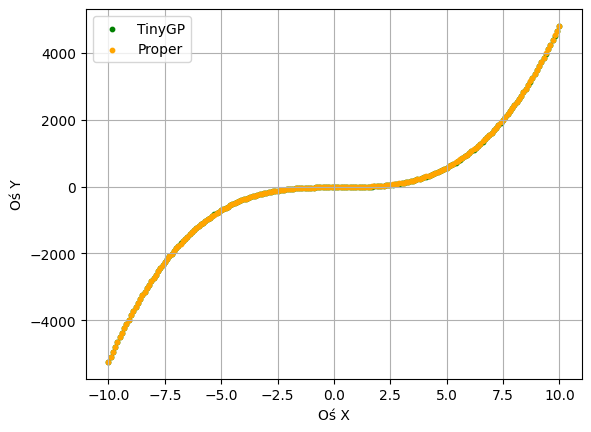

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun1 dzi1 -10 10.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun1 dzi2 0 100.dat


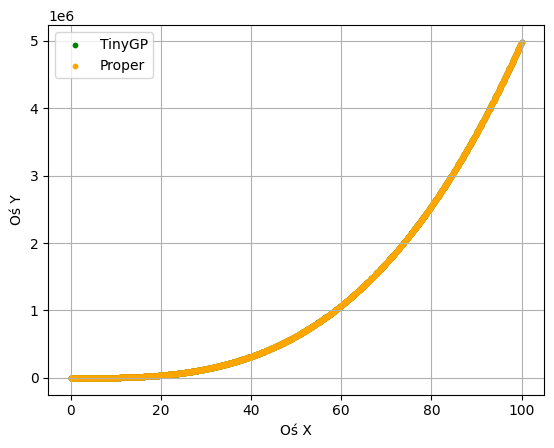

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun1 dzi2 0 100.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun1 dzi3 -1 1.dat


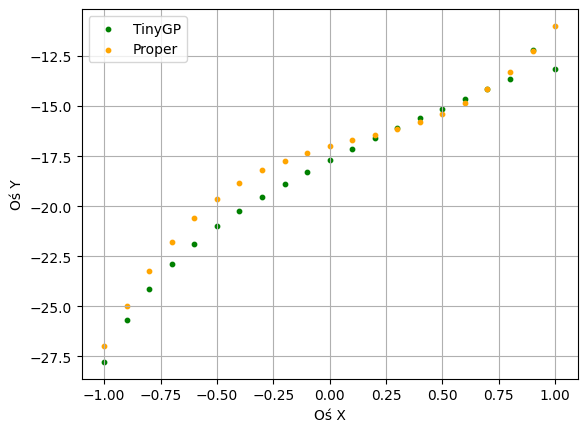

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun1 dzi3 -1 1.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun1 dzi4 -1000 1000.dat
None
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun2 dzi1 -pi pi.dat


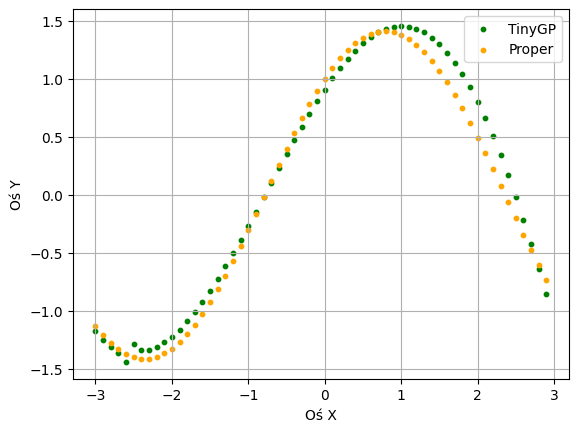

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun2 dzi1 -pi pi.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun2 dzi2 0 7.dat


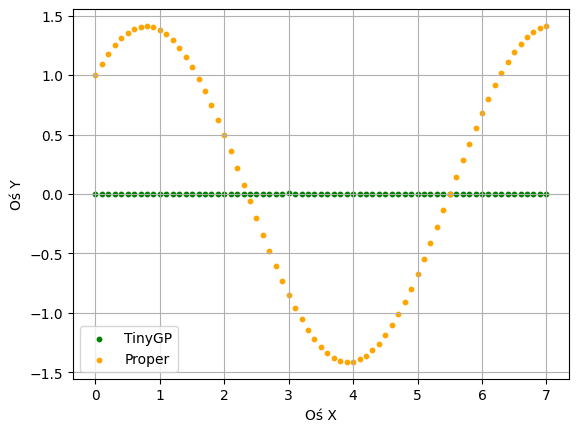

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun2 dzi2 0 7.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun2 dzi3 0 100.dat


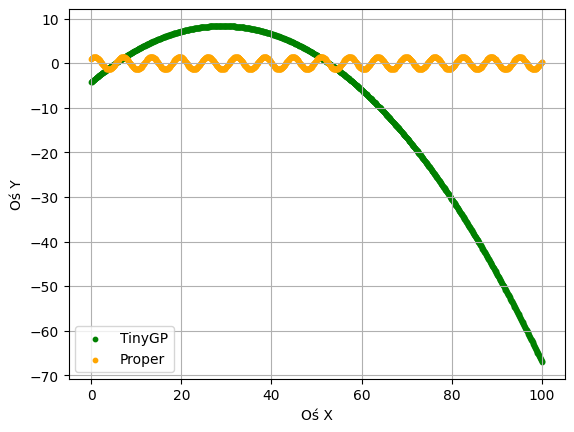

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun2 dzi3 0 100.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun2 dzi4 -100 100.dat


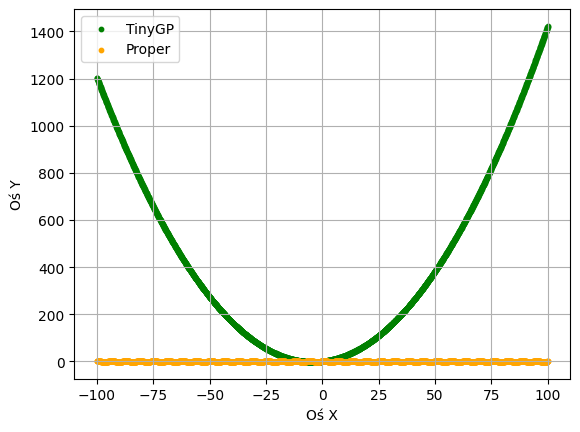

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun2 dzi4 -100 100.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun3 dzi1 0 4.dat


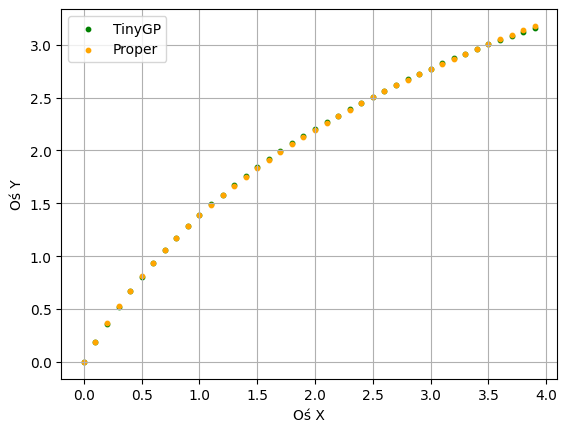

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun3 dzi1 0 4.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun3 dzi2 0 9.dat


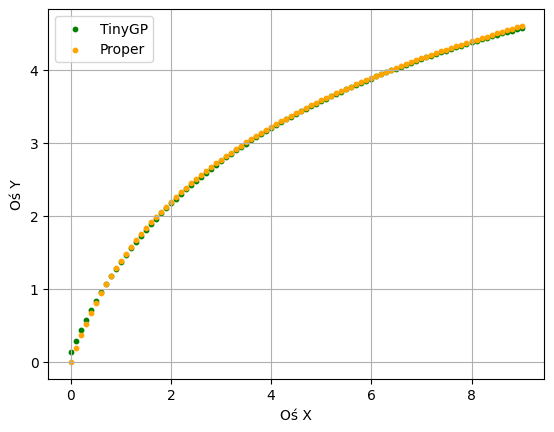

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun3 dzi2 0 9.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun3 dzi3 0 99.dat


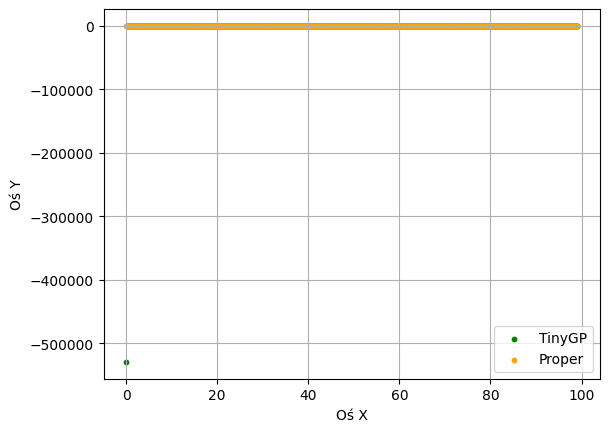

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun3 dzi3 0 99.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun3 dzi4 0 999.dat


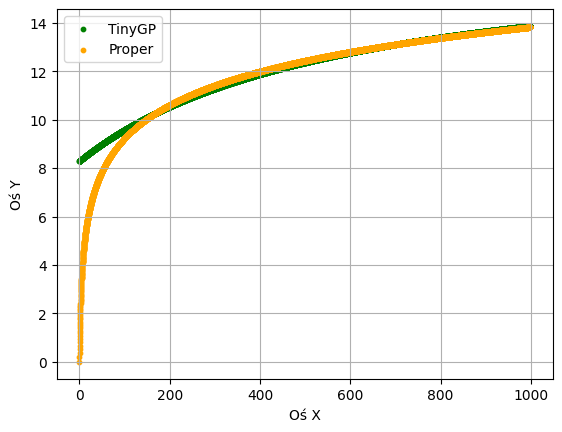

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun3 dzi4 0 999.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun4 dzi1 0 1.dat
0 1
4 1
KROK 0.1


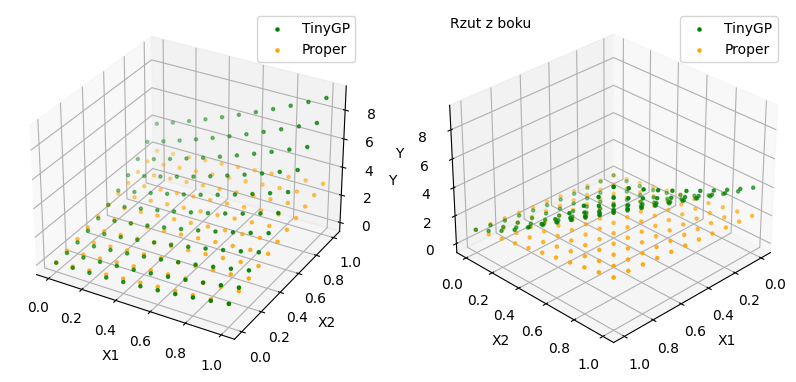

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun4 dzi1 0 1.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun4 dzi2 -10 10.dat
-10 10
4 2
KROK 0.1


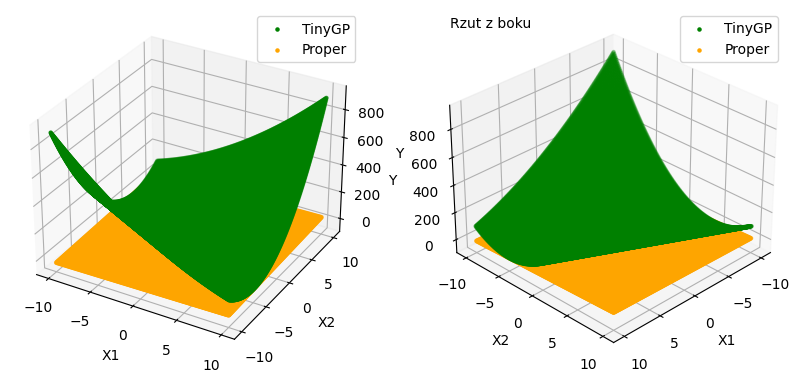

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun4 dzi2 -10 10.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun4 dzi3 0 100.dat
0 100
4 3
KROK 1


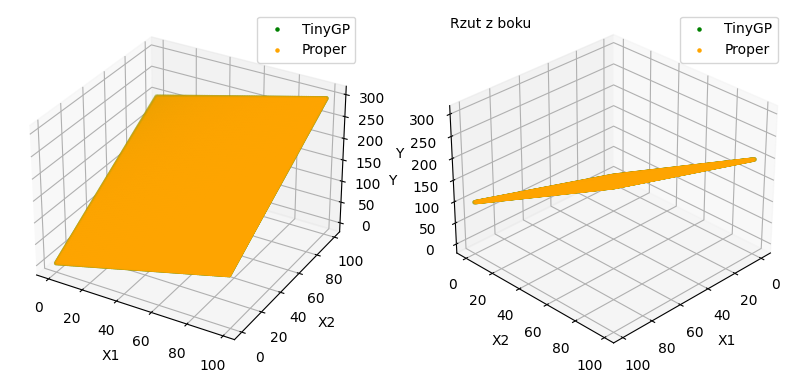

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun4 dzi3 0 100.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun4 dzi4 -1000 1000.dat
-1000 1000
4 4
KROK 10


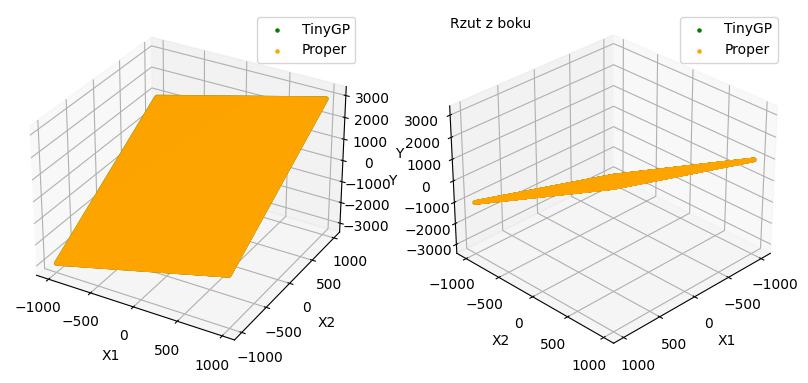

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun4 dzi4 -1000 1000.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun5 dzi1 -pi pi.dat
-3.14 3.14
5 1
KROK 0.1


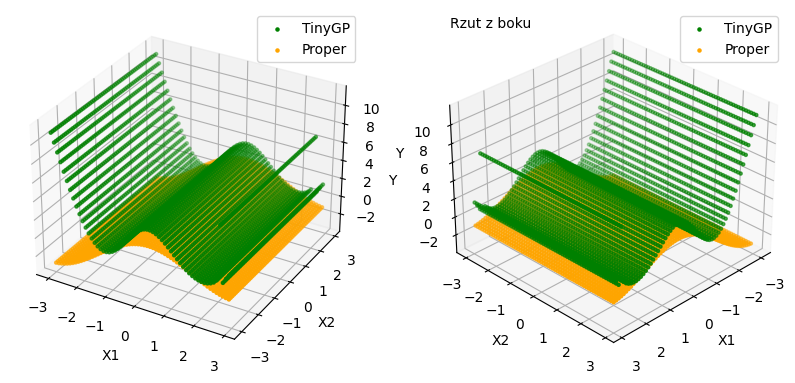

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun5 dzi1 -pi pi.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun5 dzi2 0 7.dat
0 7
5 2
KROK 0.1


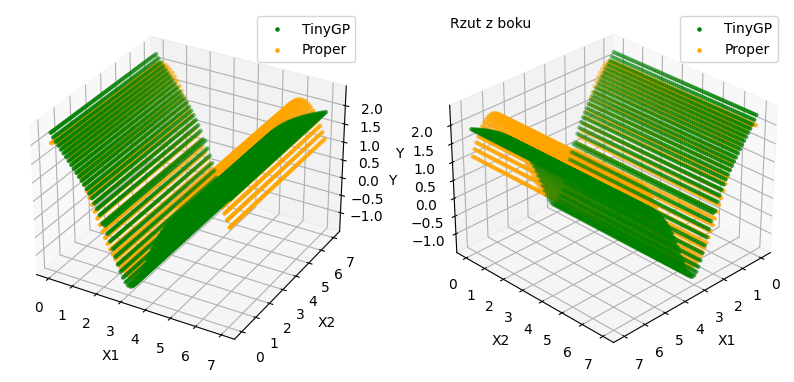

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun5 dzi2 0 7.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun5 dzi3 0 100.dat
0 100
5 3
KROK 1


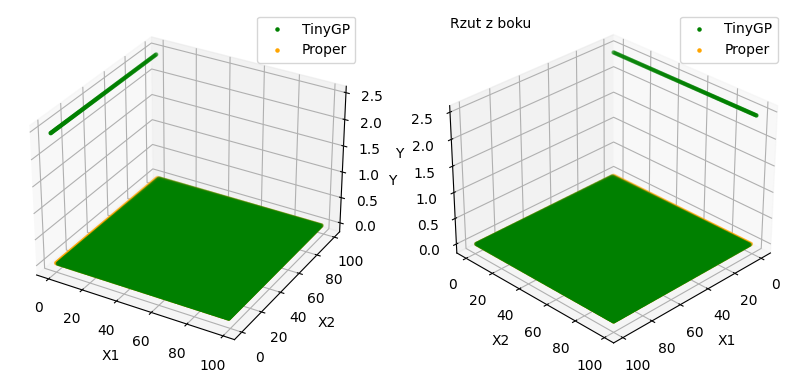

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun5 dzi3 0 100.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun5 dzi4 -100 100.dat
-100 100
5 4
KROK 1


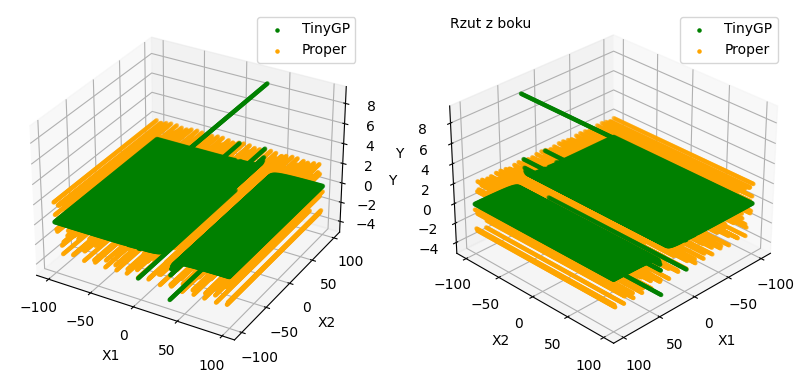

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun5 dzi4 -100 100.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun6 dzi1 -10 10.dat
-10 10
6 1
KROK 0.1


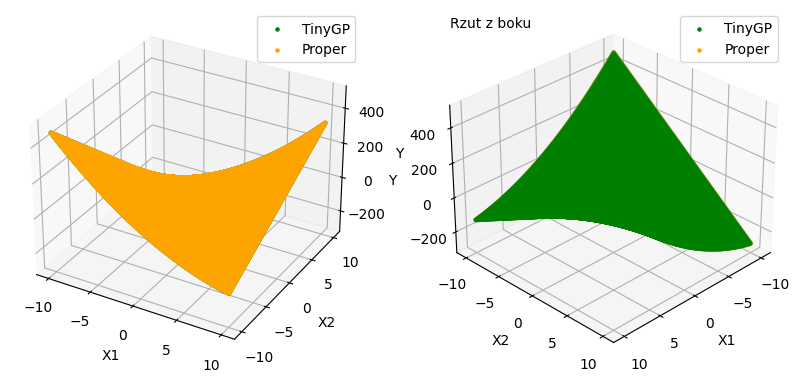

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun6 dzi1 -10 10.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun6 dzi2 0 100.dat
0 100
6 2
KROK 1


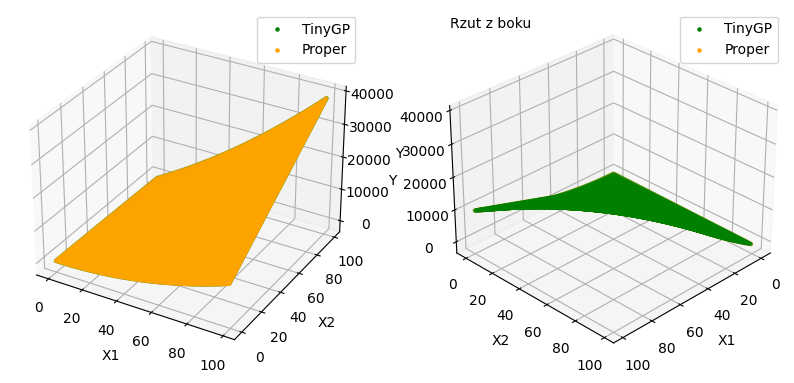

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun6 dzi2 0 100.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun6 dzi3 -1 1.dat
-1 1
6 3
KROK 0.1


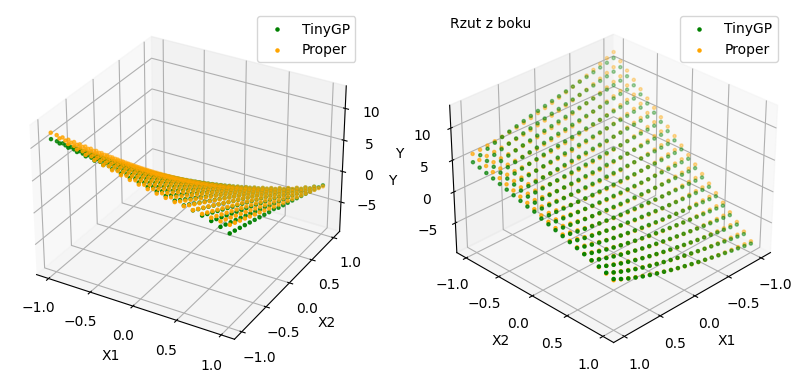

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun6 dzi3 -1 1.png
c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\done\done zad1 fun6 dzi4 -1000 1000.dat
-1000 1000
6 4
KROK 10


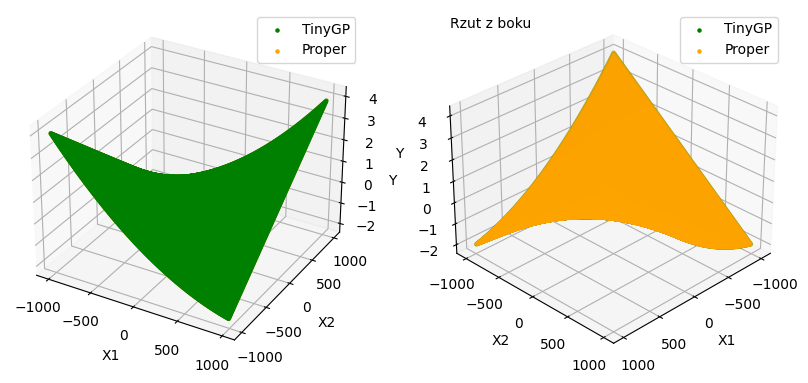

c:\Kuba-dokumenty\Studia\V semestr\Programowanie genetyczne\GeneticProgramming\files\img\img zad1 fun6 dzi4 -1000 1000.png


In [22]:
folder_glowny = os.getcwd() #sciezka do twojego folderu
pliki_done = znajdz_pliki_done(folder_glowny, "done zad1")